# Try the interpolation on synthetic data

In [94]:
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# We need these two classes to set proper ticklabels for Cartopy maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import pyproj
import numpy as np
import verde as vd
from vector3d import Vector3D

In [2]:
data = xr.open_dataset('../../data/synthetic-san-andreas-2017.nc')
data

<xarray.Dataset>
Dimensions:         (latitude: 225, longitude: 278)
Coordinates:
  * longitude       (longitude) float64 -127.0 -126.9 -126.9 -126.8 -126.8 ...
  * latitude        (latitude) float64 28.0 28.06 28.12 28.18 28.24 28.3 ...
Data variables:
    east_velocity   (latitude, longitude) float32 ...
    north_velocity  (latitude, longitude) float32 ...
    up_velocity     (latitude, longitude) float32 ...

Crop the synthetic data to a smaller region focused around the fault system.

In [35]:
data = data.sel(longitude=slice(-123, -113), latitude=slice(31, 41))
data

<xarray.Dataset>
Dimensions:         (latitude: 167, longitude: 167)
Coordinates:
  * longitude       (longitude) float64 -123.0 -122.9 -122.9 -122.8 -122.7 ...
  * latitude        (latitude) float64 31.0 31.06 31.12 31.18 31.24 31.3 ...
Data variables:
    east_velocity   (latitude, longitude) float32 -21.453661 -21.308998 ...
    north_velocity  (latitude, longitude) float32 25.987093 25.807066 ...
    up_velocity     (latitude, longitude) float32 -0.0062147873 ...

Extract a region for the data and setup a map projection.

In [36]:
proj = pyproj.Proj(proj='merc', lat_ts=data.latitude.mean())
crs = ccrs.PlateCarree()
region = vd.get_region((data.longitude.values, data.latitude.values))
print(region)

(-122.97701725172517, -113.01582193219322, 31.0025, 40.9625)


In [48]:
def setup_map(ax, title):
    "Setup a map with land and ocean polygons and proper tick labels"
    ax.set_title(title)
    # Setup the map ticks
    ax.set_xticks(np.arange(-123, -113, 2), crs=crs)
    ax.set_yticks(np.arange(32, 42, 2), crs=crs)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    # Extend the plot region to avoid cutting off some vectors at the borders
    ax.set_extent(region, crs=crs)

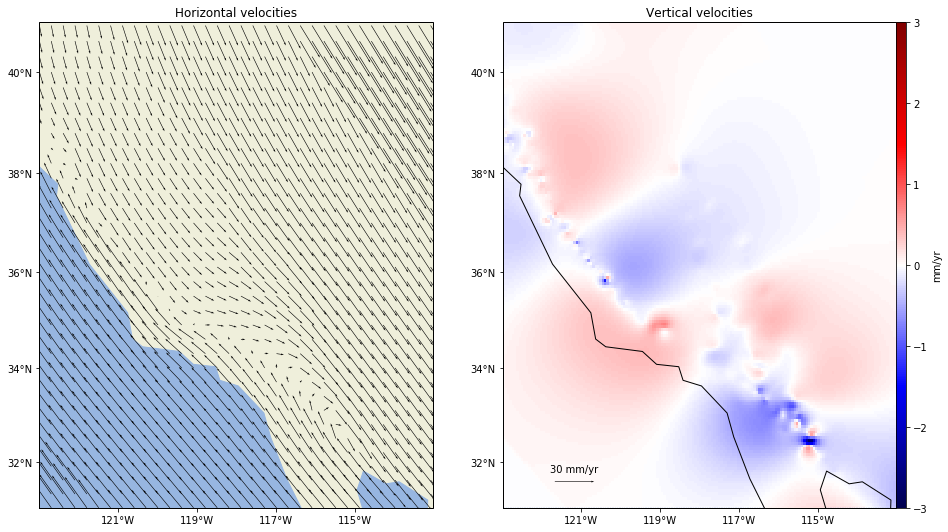

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7.5),
                         subplot_kw=dict(projection=ccrs.Mercator()))
crs = ccrs.PlateCarree()
# Plot the observed data and the residuals
ax = axes[0]
every = 5
tmp = ax.quiver(data.longitude.values[::every], data.latitude.values[::every],
                data.east_velocity.values[::every, ::every], data.north_velocity.values[::every, ::every],
                scale=300, transform=crs, width=0.0015, label="Velocities")
setup_map(ax, 'Horizontal velocities')
# Plot the gridded data and the residuals
ax = axes[1]
pc = ax.pcolormesh(data.longitude, data.latitude, data.up_velocity, cmap='seismic', vmin=-3, vmax=3,
                   transform=crs)
plt.colorbar(pc, ax=ax, pad=0, aspect=50).set_label('mm/yr')
setup_map(ax, 'Vertical velocities')
ax.coastlines()
ax.quiverkey(tmp, 0.60, 0.10, 30, label='30 mm/yr', coordinates='figure')

plt.tight_layout(w_pad=0)

## Sample the synthetic data

In [93]:
for i in data.data_vars:
    print(i)

east_velocity
north_velocity
up_velocity


In [78]:
random_state = np.random.RandomState(0)

In [90]:
data.coords.items()


ItemsView(Coordinates:
  * longitude  (longitude) float64 -123.0 -122.9 -122.9 -122.8 -122.7 -122.7 ...
  * latitude   (latitude) float64 31.0 31.06 31.12 31.18 31.24 31.3 31.36 ...)

In [97]:
for i in data.coords:
    print(i)

longitude
latitude


In [98]:
data['longitude'].size

167

In [ ]:
a = data.values
a.

In [124]:
def sample_from_grid(grid, size, random_state=None):
    if isinstance(random_state, int):
        random_state = np.random.RandomState(random_state)
    elif random_state is None:
        random_state = np.random.RandomState()
    coords = [random_state.randint(0, grid[name].size, size=size)
              for name in grid.coords]
    columns = {name: grid[name].values[*coords] for name in grid.data_vars}
    return columns
    for name in coords:
        columns[name] = sampled_grid[name].values
    
    sample = pd.DataFrame(columns)
    return sample    

SyntaxError: invalid syntax (<ipython-input-124-0f8ba14fac6a>, line 8)

In [123]:
sample_from_grid(data, 10, 0)

TypeError: invalid indexer array, does not have integer dtype: array([-120.15667882, -115.95617477, -118.9565348 , -116.79627558,
       -122.43695245, -121.71686604, -120.81675803, -117.75639079,
       -118.7765132 , -117.69638359])

In [115]:
data.isel(**b)

<xarray.Dataset>
Dimensions:         (latitude: 10, longitude: 10)
Coordinates:
  * longitude       (longitude) float64 -120.2 -116.0 -119.0 -116.8 -122.4 ...
  * latitude        (latitude) float64 39.4 34.48 33.34 36.22 36.28 35.86 ...
Data variables:
    east_velocity   (latitude, longitude) float32 5.7182026 9.496873 ...
    north_velocity  (latitude, longitude) float32 -9.768138 -13.884702 ...
    up_velocity     (latitude, longitude) float32 0.17744768 -0.021468822 ...